# Avaliação 2
## FSC5705 - Física Computacional

Use as células abaixo das questões, não crie células novas. Também, não modifique o que já está programado, apenas escreva o seu código substituindo a região marcada por:

```
# YOUR CODE HERE
raise NotImplementedError()
```

### Questão 1

**\[3 pontos\]** Considere a integral

$$
E(x) = \frac{2}{\sqrt{\pi}} \int_0^x \mathrm{e}^{-t^2}\ \mathrm{d}t.
$$

Note que esta é uma integral definida, sobre a variável $t$, com o limite superior variável. Ou seja, o resultado é uma função de $x$, chamada de *função erro*, que aparece muito em cálculos de probabilidade. Não existe maneira conhecida de resolver esta integral analiticamente. A única forma de resolvê-la é numericamente.

Escreva um programa para calcular $E(x)$, para $x = 1$. Escolha você mesmo o método e o número de intervalos. Use a função `np.exp()` para calcular a exponencial.
*Resposta*: $E(1.0) \approx 0.8427$.

In [1]:
from scipy.special import roots_legendre
import numpy as np

def f(t):
    A = 2 / (np.pi)**(1/2)
    return A * np.exp(-(t)**2)

N = 10
a = 0.0
b = 1.0

u, _w = roots_legendre(N)

I = 0
for k in range(N):
    xk = (b - a) / 2 * u[k] + (b + a) / 2
    wk = (b - a) / 2 * _w[k]
    
    I += wk * f(xk)

I_target = 0.8427

print(f'Quadratura Gaussiana (N = {N}) = {I}')
print(f'Integral analítica = {I_target}')
print(f'Erro relativo = {(I - I_target) / I_target}')

Quadratura Gaussiana (N = 10) = 0.8427007929497149
Integral analítica = 0.8427
Erro relativo = 9.409632311493102e-07


### Questão 2

**\[3 pontos\]** Programe a função abaixo tal que ela calcule $E(x)$ para um $x$ qualquer passado como parâmetro.
Utilizando a função que você programou, calcule $E(1.0)$. O resultado deve ser igual ao do item anterior.

In [4]:
def integral_qgauss(f, a, b, N):
    from scipy.special import roots_legendre 

    u, _w = roots_legendre(N)

    I = 0
    for k in range(N):
        xk = (b - a) / 2 * u[k] + (b + a) / 2
        wk = (b - a) / 2 * _w[k]
        I += wk * f(xk)
    return I

def f(t):
    return np.exp(-(t)**2)

def erf(x):
    '''
    Parâmetros
    ----------
    x : float
    Abscissa da função
    
    Retorna
    -------
    E : float
    Função erro no ponto x
    '''
    I = integral_qgauss(f, 0, x, N)
    A = 2 / (np.pi)**(1/2)
    E = A * I
    return E

E_1 = erf(1.0)
print(f'E(1.0) = {E_1}')

E(1.0) = 0.8427007929497149


### Questão 3

**\[4 pontos\]** Usando a função programada acima, faça o gráfico de $E(x)$ para $-3 < x < 3$, com pontos em intervalos de $0.1$. Não esqueça das etiquetas dos eixos e do título.

*Dicas: Use listas para guardar os valores a serem plotados, como foi feito nos gráficos do texto. Compare o seu gráfico com o que aparece na [página da Wikipedia sobre função erro](https://en.wikipedia.org/wiki/Error_function), para saber se o resultado está correto.*

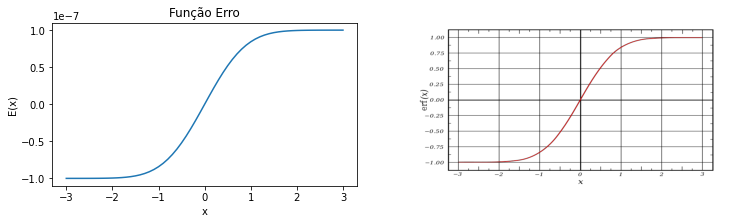

In [3]:
import matplotlib.pyplot as plt
from skimage import io
import numpy as np

Xi = -3.0
Xf = 3.0
dx = 0.1

X_range = np.arange(Xi, Xf + dx, dx)
lista_E = []

for x in X_range:
    E = erf(x)
    lista_E.append (E / 1e7)
    
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))
axes[0].plot(X_range, lista_E)
axes[0].set_xlabel(r'x')
axes[0].set_ylabel(r'E(x)')
axes[0].set_title('Função Erro')

#Comparando com a imagem da Wikipédia, pode-se atestar que o resultado é muito bom, pelo menos quanto à forma.
image = io.imread("https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Error_Function.svg/800px-Error_Function.svg.png")
axes[1].imshow(image,aspect="auto")
axes[1].axis('off')
plt.show()
